<style>
	.title {
		text-align: center;
		font-size: 70px;
		font-weight: bold;
	}
	.subtitle {
		text-align: center;
		font-style: italic;
		font-size: 30px;
	}
	.authors {
		text-align: center;
		font-size: 20px;
		padding: 10px;
	}
	.introduction {
		font-family: Arial, sans-serif;
		font-size: 18px;
		line-height: 1.6;
		text-align: justify;
		margin: 20px;
		padding: 15px;
		background-color:rgb(37, 37, 37);
		border-left: 5px solid #4CAF50;
		color: rgb(222, 222, 222);
		max-width: 90%;
	}
</style>

<hr/>
<div class="title">ENSF 444 Final Project</div>
<div class="subtitle">[ Magic: The Gathering ] Card Color Classification</div>
<div class="authors">Luca Rios & Cody Casselman</div>
<hr/>

<div class="introduction">
	<h2>Introduction</h2>
	<p>
		Magic: The Gathering (MTG) is a trading card game with around 27,000 unique cards. Each card has (at least one) color associated with it, which is a key part of the game. The colors are divided into five categories: White, Blue, Black, Red, and Green. Each color has its own unique playstyle and mechanics; however, for this project, we will be focusing on the color classification of cards.
	</p>
	<p>
		The objective of this project is to predict the color classification of MTG cards based on their oracle text (the descriptive text on the card) using a machine learning model. We will utilize a dataset containing all unique MTG cards, including their oracle text and corresponding color, to train and evaluate our model.
	</p>
	<br/>
</div>

<style>
	.data-collection {
		font-family: Arial, sans-serif;
		font-size: 18px;
		line-height: 1.6;
		text-align: justify;
		margin: 20px;
		padding: 15px;
		background-color:rgb(37, 37, 37);
		border-left: 5px solid rgb(76, 144, 175);
		color: rgb(222, 222, 222);
		max-width: 90%;
	}
</style>

<div class="data-collection">
	<h2>Data Collection</h2>
	<p>
		The dataset used for this project was obtained from the <a href="https://scryfall.com/">Scryfall API</a>. Scryfall is a comprehensive database of Magic: The Gathering cards, and their API provides access to a wealth of information about each card, including its name, type, color identity, and oracle text. The dataset contains over 27,000 unique cards, making it an ideal resource for our project.
	</p>
	<p>
		The data was collected using Python and the requests library to make API calls to Scryfall. We retrieved the card data in JSON format and stored it in a CSV file for further processing. The dataset only includes the oracle text and color identity of each card, as these are the two features we will be using for our machine learning model. The oracle text is the descriptive text on the card that explains its abilities and effects, while the color identity is a list of colors associated with the card. The dataset was cleaned and preprocessed to remove any unnecessary information and ensure that it was in a suitable format for analysis.
	</p>
	<h3>Scope of the Dataset</h3>
	<p>
		Since cards can have multiple colors, we have chosen to forgo any multi-coloured cards in our dataset. This means that we will only be using cards that are classified as mono-colored, which simplifies the classification task. This choice was made to ensure that our model focuses on the core mechanics of each color without the added complexity of multi-colored cards that can tend to blur the lines between the themes of each color.
	</p>
	<br/>
</div>

<style>
	.requirements {
		font-family: Arial, sans-serif;
		font-size: 18px;
		line-height: 1.6;
		text-align: justify;
		margin: 20px;
		padding: 15px;
		background-color: rgb(37, 37, 37);
		border-left: 5px solid rgb(255, 0, 0);
		color: rgb(222, 222, 222);
		max-width: 90%;
	}
</style>

<div class="requirements">
	<h2>Requirements</h2>
	<p>
		Our project requires the following libraries to be installed. You can install them using pip by running the following command in your terminal:
	</p>
	<pre><code> pip install -r requirements.txt </code></pre>
	<br/>
</div>

In [41]:
import pandas as pd
import joblib
import requests
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

<style>
	.subsection {
		text-align: center;
		font-weight: bold;
		font-size: 50px;
	}
</style>

<hr style="border: 5px solid rgb(76, 144, 175); width: 100%; margin: 20px auto;">
<!-- Step One: Data Cleaning -->
<div class="subsection">Step One: Data Cleaning</div>
<!-- Blue Horizontal line -->
<hr style="border: 5px solid rgb(76, 144, 175); width: 100%; margin: 20px auto;">

In [4]:
# Importing the dataset
data = pd.read_csv("ml_data.csv")
data.head()

,color,text
0,black,Legendary Creature — Zombie Wizard When Acerer...
1,black,Creature — Beholder When Baleful Beholder ente...
2,black,Sorcery As an additional cost to cast this spe...
3,black,Creature — Zombie First strike Whenever a crea...
4,black,Creature — Demon Flying When this creature ent...


In [5]:
#checking for NaN
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22395 entries, 0 to 22394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   22395 non-null  object
 1   text    22395 non-null  object
dtypes: object(2)
memory usage: 350.1+ KB
None
color    0
text     0
dtype: int64


In [6]:
# Since our data contains relatively few NaN values, we can just remove the rows that contain them
data = data.dropna()
print(data.isnull().sum())
data.info()

color    0
text     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22395 entries, 0 to 22394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   22395 non-null  object
 1   text    22395 non-null  object
dtypes: object(2)
memory usage: 350.1+ KB


In [7]:
# Creating our feature matrix and target vector
X = data["text"]
y = data["color"]

In [8]:
# Splitting our training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

<style>
	.subsection {
		text-align: center;
		font-weight: bold;
		font-size: 50px;
	}
</style>

<hr style="border: 5px solid rgb(189, 255, 36); width: 100%; margin: 20px auto;">
<!-- Step One: Model Creation -->
<div class="subsection">Step Two: Model Creation</div>
<!-- Blue Horizontal line -->
<hr style="border: 5px solid rgb(189, 255, 36); width: 100%; margin: 20px auto;">

<style>
	.subsubsection {
		text-align: center;
		font-weight: bold;
		font-size: 40px;
	}
</style>

<div class="subsubsection">Model One:</div>
<div class="subsubsection">Multinomial Naive Bayes</div>

### Naive Approach

In [9]:

mnb_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.3, min_df=0.00, ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

mnb_clf.fit(X_train, y_train)

y_pred = mnb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7736607142857143
              precision    recall  f1-score   support

       black       0.82      0.80      0.81       438
        blue       0.74      0.83      0.78       428
       green       0.79      0.71      0.75       458
         red       0.81      0.76      0.78       479
       white       0.72      0.78      0.75       437

    accuracy                           0.77      2240
   macro avg       0.78      0.77      0.77      2240
weighted avg       0.78      0.77      0.77      2240



### Determining the Best Encoder Using a Grid Search CV

In [74]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
    ("clf", MultinomialNB())
])

param_grid = [{"tfidf":[TfidfVectorizer()],
               "tfidf__max_df":[x * 0.01 for x in range(15, 25, 1)],
               "tfidf__min_df":[0.00, 0.01, 0.02]
               }]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True, error_score='raise')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('clf', MultinomialNB())]),
             param_grid=[{'tfidf': [TfidfVectorizer()],
                          'tfidf__max_df': [0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
                                            0.21, 0.22, 0.23, 0.24],
                          'tfidf__min_df': [0.0, 0.01, 0.02]}],
             return_train_score=True)

In [75]:
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Training Score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.72
Training Score: 0.77
Test set score: 0.74
Best parameters: {'tfidf': TfidfVectorizer(), 'tfidf__max_df': 0.17, 'tfidf__min_df': 0.0}


In [76]:
y_pred = grid.predict(X_test)
print('MultinomialNB Classification Report and Accuracy Score')
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

MultinomialNB Classification Report and Accuracy Score
Accuracy: 0.7352678571428571
              precision    recall  f1-score   support

       black       0.79      0.75      0.77       438
        blue       0.69      0.80      0.74       428
       green       0.77      0.70      0.73       458
         red       0.78      0.71      0.74       479
       white       0.66      0.73      0.69       437

    accuracy                           0.74      2240
   macro avg       0.74      0.74      0.74      2240
weighted avg       0.74      0.74      0.74      2240



In [12]:
# Save model 1 data for future use
joblib.dump(grid, 'model1.pkl')

['model1.pkl']

<style>
	.subsubsection {
		text-align: center;
		font-weight: bold;
		font-size: 40px;
	}
</style>

<div class="subsubsection">Model Two:</div>
<div class="subsubsection">Support Vector Machine with NonLinear Kernel</div>

In [13]:
# Create a pipeline with TfidfVectorizer and SVM classifier
svm_clf = Pipeline([
	('tfidf', TfidfVectorizer(stop_words='english', max_df=0.3, min_df=0.00, ngram_range=(1, 2))),
	('clf', SVC(kernel='rbf', probability=True))
])

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.8035714285714286
              precision    recall  f1-score   support

       black       0.84      0.80      0.82       438
        blue       0.79      0.85      0.82       428
       green       0.83      0.79      0.81       458
         red       0.84      0.79      0.81       479
       white       0.74      0.80      0.76       437

    accuracy                           0.80      2240
   macro avg       0.80      0.80      0.80      2240
weighted avg       0.81      0.80      0.80      2240



In [14]:
# Save model 2 data for future use
joblib.dump(svm_clf, 'model2.pkl')

['model2.pkl']

<style>
	.subsubsection {
		text-align: center;
		font-weight: bold;
		font-size: 40px;
	}
</style>

<div class="subsubsection">Model Three:</div>
<div class="subsubsection">Random Forest Classifier</div>

In [15]:
# Create a pipeline with TfidfVectorizer and Random Forest Classifier
rf_clf = Pipeline([
	('tfidf', TfidfVectorizer(stop_words='english', max_df=0.3, min_df=0.00, ngram_range=(1, 2))),
	('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.784375
              precision    recall  f1-score   support

       black       0.82      0.79      0.81       438
        blue       0.75      0.84      0.79       428
       green       0.83      0.75      0.79       458
         red       0.82      0.78      0.80       479
       white       0.71      0.77      0.74       437

    accuracy                           0.78      2240
   macro avg       0.79      0.79      0.78      2240
weighted avg       0.79      0.78      0.78      2240



In [22]:
# Save model 3 data for future use
joblib.dump(rf_clf, 'model3.pkl')
# Load model
loaded_model = joblib.load('model3.pkl')

<style>
	.subsection {
		text-align: center;
		font-weight: bold;
		font-size: 50px;
	}
</style>

<hr style="border: 5px solid rgb(233, 145, 255); width: 100%; margin: 20px auto;">
<!-- Step One: Model Creation -->
<div class="subsection">Step Three:</div>
<div class="subsection">Model Testing & Comparison</div>
<!-- Blue Horizontal line -->
<hr style="border: 5px solid rgb(233, 145, 255); width: 100%; margin: 20px auto;">

In [32]:
test_cards = ["Teval, the Balanced Scale","Eriette of the Charmed Apple","Zinnia, Valley's Voice"]
test_cards_data = []
url = "https://api.scryfall.com/cards/search"

color_codes = {
	"W": "White",
	"U": "Blue",
	"B": "Black",
	"R": "Red",
	"G": "Green"
}

for card in test_cards:
	params = {
		"q": card,
		"unique": "prints"
	}
	response = requests.get(url, params=params)
	data = response.json()
	if data['total_cards'] > 0:
		card_data = data['data'][0]
		name = card_data.get("name")
		colors = card_data.get("colors", [])
		colors = [color_codes[color] for color in colors if color in color_codes]
		text = card_data.get("type_line", "") + " " + card_data.get("oracle_text", "")
		test_cards_data.append({"name": name, "colors": colors, "text": text})
		print(f"Card: {name}\nColors: {colors}\nText: {text}\n")
	else:
		test_cards_data.append({"name": card, "colors": [], "text": ""})

Card: Teval, the Balanced Scale
Colors: ['Black', 'Green', 'Blue']
Text: Legendary Creature — Spirit Dragon Flying
Whenever Teval attacks, mill three cards. Then you may return a land card from your graveyard to the battlefield tapped.
Whenever one or more cards leave your graveyard, create a 2/2 black Zombie Druid creature token.

Card: Eriette of the Charmed Apple
Colors: ['Black', 'White']
Text: Legendary Creature — Human Warlock Each creature that's enchanted by an Aura you control can't attack you or planeswalkers you control.
At the beginning of your end step, each opponent loses X life and you gain X life, where X is the number of Auras you control.

Card: Zinnia, Valley's Voice
Colors: ['Red', 'Blue', 'White']
Text: Legendary Creature — Bird Bard Flying
Zinnia gets +X/+0, where X is the number of other creatures you control with base power 1.
Creature spells you cast have offspring {2}. (You may pay an additional {2} as you cast a creature spell. If you do, when that creature e

In [ ]:
for input_card in test_cards_data:
	text = input_card["text"]
	name = input_card["name"]
	colors = input_card["colors"]
	prediction = loaded_model.predict([text])[0]
	probabilities = loaded_model.predict_proba([text])[0]
	top_2_indices = probabilities.argsort()[-2:][::-1]  # Get indices of top 2 probabilities
	top_2_colors = [class_labels[i] for i in top_2_indices]
	top_2_probabilities = probabilities[top_2_indices] * 100
	print(f'Input Card "{name}" predicted as: {prediction}')
	print(f'Actual Colors: {", ".join(colors)}')
	for color, prob in zip(top_2_colors, top_2_probabilities):
		print(f'{color}: {prob:.2f}%')
	print()

Input Card "Teval, the Balanced Scale" predicted as: green
Actual Colors: Black, Green, Blue
Green: 35.00%
Black: 27.00%

Input Card "Eriette of the Charmed Apple" predicted as: black
Actual Colors: Black, White
Black: 81.00%
Red: 11.00%

Input Card "Zinnia, Valley's Voice" predicted as: blue
Actual Colors: Red, Blue, White
Blue: 38.00%
Red: 33.00%



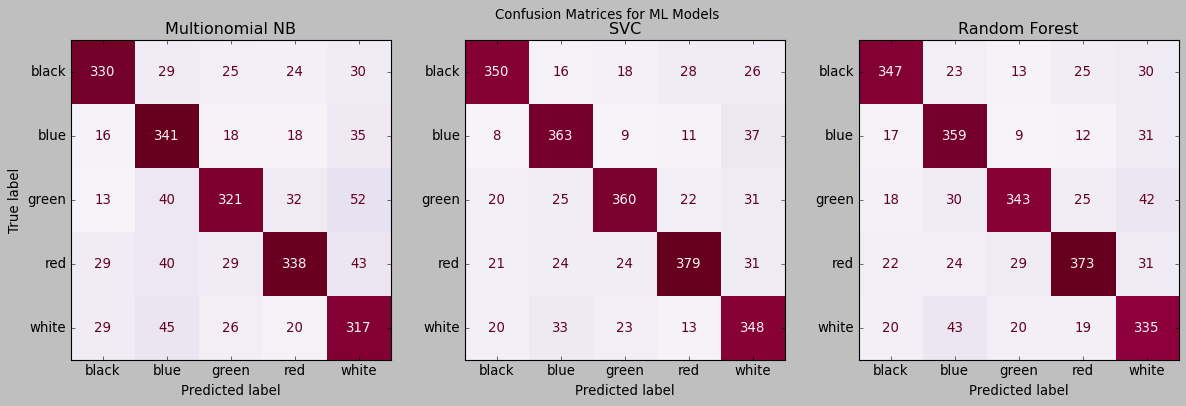

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.style.use('classic')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices for ML Models')
# creating a confusion matrix for each model
models = {'Multionomial NB':'model1.pkl', 'SVC':'model2.pkl', 'Random Forest':'model3.pkl'}
for idx, model in enumerate(models):
    loaded_model = joblib.load(models[model])
    disp = ConfusionMatrixDisplay.from_estimator(
        loaded_model, X_test, y_test, ax=axs[idx], cmap='PuRd', colorbar=False
    )
    axs[idx].set_title(model)

    if idx != 0:
        axs[idx].set_ylabel('')


# Reflection And Conclusions

<style>
	.comparisons {
		font-family: Arial, sans-serif;
		font-size: 18px;
		line-height: 1.6;
		text-align: justify;
		margin: 20px;
		padding: 15px;
		background-color:rgb(37, 37, 37);
		border-left: 5px solid rgb(36, 179, 138);
		color: rgb(222, 222, 222);
		max-width: 90%;
	}
</style>

<div class="comparisons">
	<h2>Comparing Our Models</h2>
	<p>
		Between each of our models, we saw that each model behaved incredibly similarly; all hovering around 80% accuracy. We have summarized our results in the table below.
	</p>
	<table>
		<tr>
			<th>Metric</th>
			<th>Mutltinomial NB</th>
			<th>SVC with NonLinear Kernel</th>
			<th>Random Forest Classifier</th>
		</tr>
		<tr>
			<th>Accuracy</th>
			<td>0.74</td>
			<td>0.80</td>
			<td>0.78</td>
		</tr>
		<tr>
			<th>Avg. Precision</th>
			<td>0.74</td>
			<td>0.80</td>
			<td>0.79</td>
		</tr>
		<tr>
			<th>Avg. Recall</th>
			<td>0.74</td>
			<td>0.80</td>
			<td>0.79</td>
		</tr>
		<tr>             
			<th>Avg. f1Score</th>
			<td>0.74</td>
			<td>0.80</td>
			<td>0.78</td>
		</tr>
	</table>
	<p>
		From the table above, it is clear that the best performing model was the SVC with a NonLinear kernel. Then our second best performing model was our Random Forest Classifier, with our Multinomial Naive Bayes in third. Although, it is relevent to note that each model had incredibly similar performance, with our best performing only being 0.06% more accurate than our worst.
	</p>
	<p>
		In the context of our project, we have determined our accuracy reports to label our models as good enough for the dataset they were applied to. While doing individual testing of cards, we consistently found that our model would predict the color correctly. Interestingly, when tested with multi-colored cards, we found our modal to still perform quite well, as it would consistently guess the "dominant" color correctly, and then list the other secondary colors as the next most likely colors for the cards. We are additionally impressed with the performance of our model due to the difficulty of the dataset. Text data can be difficult to train ML models with, and a lot of magic the gathering cards tend to be incredibly similar in their text. Because of these difficulties, we were very impressed with our relatively high-accuracy models.
	</p>
	<br/>
</div>